# Bacchanal-Buffet-at-Caesars-Palace Restaurant--Classification and Sentiment Analysis

<img src="https://assets.simpleviewcms.com/simpleview/image/fetch/c_pad,h_600,q_75,w_1122/https://lasvegas.simpleviewcrm.com/images/listings/original_Bacchanal-Buffet-at-Caesars-Palace.jpg">

In [44]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

from wordcloud import WordCloud
from wordcloud import STOPWORDS
from PIL import Image

from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
#accuaracy
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline


from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.stem import PorterStemmer
pr = PorterStemmer()
from textblob import Word,TextBlob
import nltk
from langdetect import detect
nltk.download('stopwords')
from nltk.corpus import stopwords

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admcn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## EDA

In [2]:
df = pd.read_csv("restaurant.csv")
df.head()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,After getting food poisoning at the Palms hote...,2012-12-04 03:10:18
1,2370357,JlNnsvMPLK_1-X2hwzK24w,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,21,29,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",2014-01-17 00:50:50
2,2370373,hBkoWffORRb6aqKhC_Li2A,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,1,1,The crab legs are better than the ones at Wick...,2015-06-08 18:03:09
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,Not worth it! Too salty food and expensive! Th...,2016-12-19 16:15:29
4,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,I would give this infinite stars if I could. M...,2015-07-28 07:13:17


In [3]:
df.sample(5)

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
9738,3159494,zMfpKOxk4pfdqabA-7W45g,1jrh0_Vqb6qAFDdriLa3XQ,RESDUcs7fIiihp38-d6_6g,5,0,0,0,"Excelente comida,muy fresca y bien elaborada,p...",2019-09-11 22:41:13
6987,2907814,m8wFhhgC1ynyOEI-Tphg6w,3nz9Jg17Evi7sDCFwgXN0w,RESDUcs7fIiihp38-d6_6g,3,0,0,0,"Good food, lot of varieties, nice ambience, go...",2014-09-08 15:29:12
5510,2785492,QO_9w4E9YztISIetq9IZHQ,erJ1HQwavgZx4996SMIxrA,RESDUcs7fIiihp38-d6_6g,5,8,4,6,The Wonderful:\n Lamb chops were errmageerrrd ...,2012-09-28 16:54:02
5819,2808121,zc9zuRZyo0r_EHnk7Ol7wQ,iNBuPAUsAM18K4jifgFMtg,RESDUcs7fIiihp38-d6_6g,5,1,0,0,This buffet is overwhelmingly big. I really li...,2018-04-03 03:43:53
10291,3210581,j3RvG8ubpVCqtq8F2_fvbQ,vLL4sUzwuoQPRUda6d7qZg,RESDUcs7fIiihp38-d6_6g,1,0,1,0,Don't go unless you're diamond or seven stars....,2019-11-25 00:54:47


In [4]:
df.shape

(10417, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10417 entries, 0 to 10416
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   10417 non-null  int64 
 1   review_id    10417 non-null  object
 2   user_id      10417 non-null  object
 3   business_id  10417 non-null  object
 4   stars        10417 non-null  int64 
 5   useful       10417 non-null  int64 
 6   funny        10417 non-null  int64 
 7   cool         10417 non-null  int64 
 8   text         10417 non-null  object
 9   date         10417 non-null  object
dtypes: int64(5), object(5)
memory usage: 814.0+ KB


In [6]:
df.isnull().sum()

Unnamed: 0     0
review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

In [7]:
df["useful"].value_counts(normalize=True)

useful
0      0.581645
1      0.188346
2      0.084573
3      0.046463
4      0.027551
5      0.015647
6      0.012192
7      0.008352
8      0.005952
9      0.005568
10     0.003168
12     0.003072
15     0.002016
11     0.002016
13     0.001824
16     0.001536
14     0.001344
17     0.000960
18     0.000864
19     0.000768
20     0.000480
26     0.000480
22     0.000384
21     0.000384
27     0.000288
34     0.000288
35     0.000192
29     0.000192
24     0.000192
49     0.000192
25     0.000192
74     0.000192
31     0.000192
30     0.000192
39     0.000192
38     0.000096
45     0.000096
176    0.000096
23     0.000096
50     0.000096
32     0.000096
61     0.000096
37     0.000096
36     0.000096
41     0.000096
51     0.000096
47     0.000096
171    0.000096
135    0.000096
95     0.000096
72     0.000096
46     0.000096
75     0.000096
57     0.000096
58     0.000096
59     0.000096
155    0.000096
Name: proportion, dtype: float64

In [8]:
df["funny"].value_counts(normalize=True)

funny
0      0.780935
1      0.123644
2      0.039167
3      0.016703
4      0.010848
5      0.007488
6      0.004224
7      0.003360
8      0.002016
9      0.001728
11     0.001440
10     0.001344
15     0.000864
13     0.000768
12     0.000480
14     0.000480
17     0.000480
22     0.000288
20     0.000288
25     0.000288
28     0.000288
18     0.000288
21     0.000192
16     0.000192
19     0.000192
39     0.000192
24     0.000192
53     0.000192
87     0.000096
159    0.000096
51     0.000096
33     0.000096
23     0.000096
36     0.000096
83     0.000096
88     0.000096
29     0.000096
44     0.000096
43     0.000096
62     0.000096
26     0.000096
52     0.000096
111    0.000096
Name: proportion, dtype: float64

In [9]:
df["cool"].value_counts(normalize=True)

cool
0      0.750504
1      0.138620
2      0.046847
3      0.021215
4      0.011040
5      0.006240
6      0.005472
7      0.003360
8      0.002688
9      0.002592
11     0.001536
12     0.001344
14     0.001056
10     0.001056
15     0.000576
25     0.000576
13     0.000480
16     0.000384
21     0.000384
29     0.000384
31     0.000288
19     0.000288
18     0.000288
32     0.000192
17     0.000192
20     0.000192
54     0.000192
40     0.000192
43     0.000096
62     0.000096
22     0.000096
26     0.000096
39     0.000096
172    0.000096
162    0.000096
125    0.000096
56     0.000096
36     0.000096
24     0.000096
68     0.000096
48     0.000096
67     0.000096
30     0.000096
23     0.000096
82     0.000096
47     0.000096
153    0.000096
Name: proportion, dtype: float64

In [10]:
df["stars"].value_counts(normalize=True)


stars
5    0.407699
4    0.253048
3    0.149851
1    0.101373
2    0.088029
Name: proportion, dtype: float64

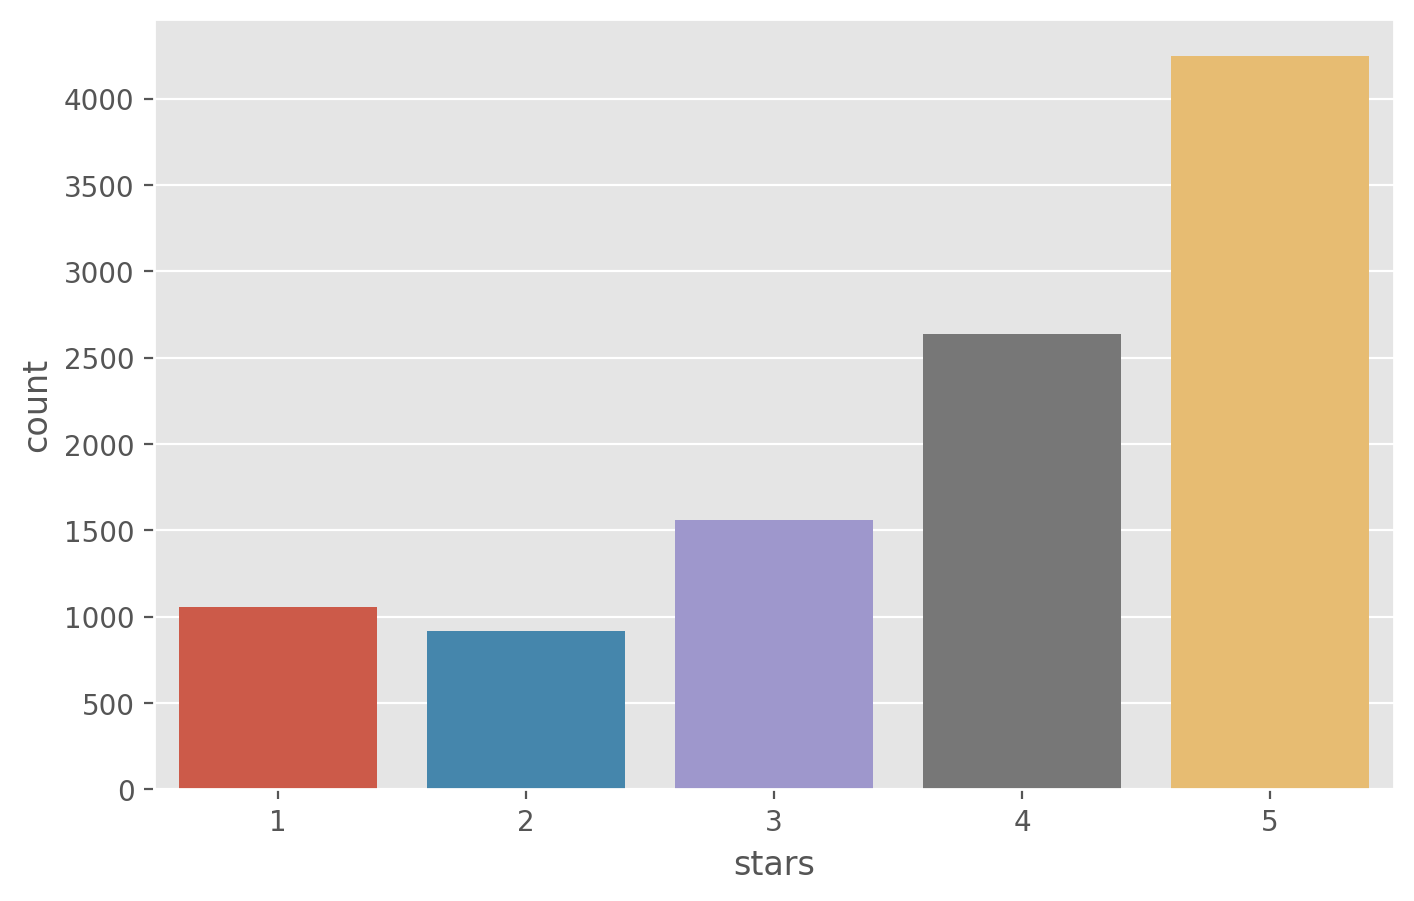

In [11]:
plt.style.use("ggplot")
plt.figure(figsize=(8,5), dpi=200)
sns.countplot(x = df.stars);

## FEATURE ENGINEERING

In [12]:
df["year"] = pd.DatetimeIndex(df["date"]).year
df.sample(2)

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date,year
2297,2542389,ai9fP8Zo4JIz2cIDXdzRNA,DMGFkG1m06GHCAZBIA6PtQ,RESDUcs7fIiihp38-d6_6g,4,0,0,0,The food at this buffet is very high quality. ...,2016-03-10 05:33:10,2016
9536,3139854,WiEdEBwjSUf7V2r0FUXRSw,5VA6pfDEDDMYG0IeGk8OMQ,RESDUcs7fIiihp38-d6_6g,5,3,1,4,I came to celebrate my birthday at Vegas speci...,2019-10-04 22:08:31,2019


In [13]:
df2 = pd.DataFrame(df.groupby("year").stars.mean())
df2["stars"].sort_values(ascending=False)


year
2013    3.930833
2012    3.899297
2015    3.870331
2014    3.809704
2019    3.807715
2018    3.714286
2017    3.685768
2016    3.613703
Name: stars, dtype: float64

In [14]:
# Reset the index of df2 if necessary to use the index as a column in the plot
df2_reset = df2.reset_index()



In [15]:
df2

,stars
year,
2012,3.899297
2013,3.930833
2014,3.809704
2015,3.870331
2016,3.613703
2017,3.685768
2018,3.714286
2019,3.807715


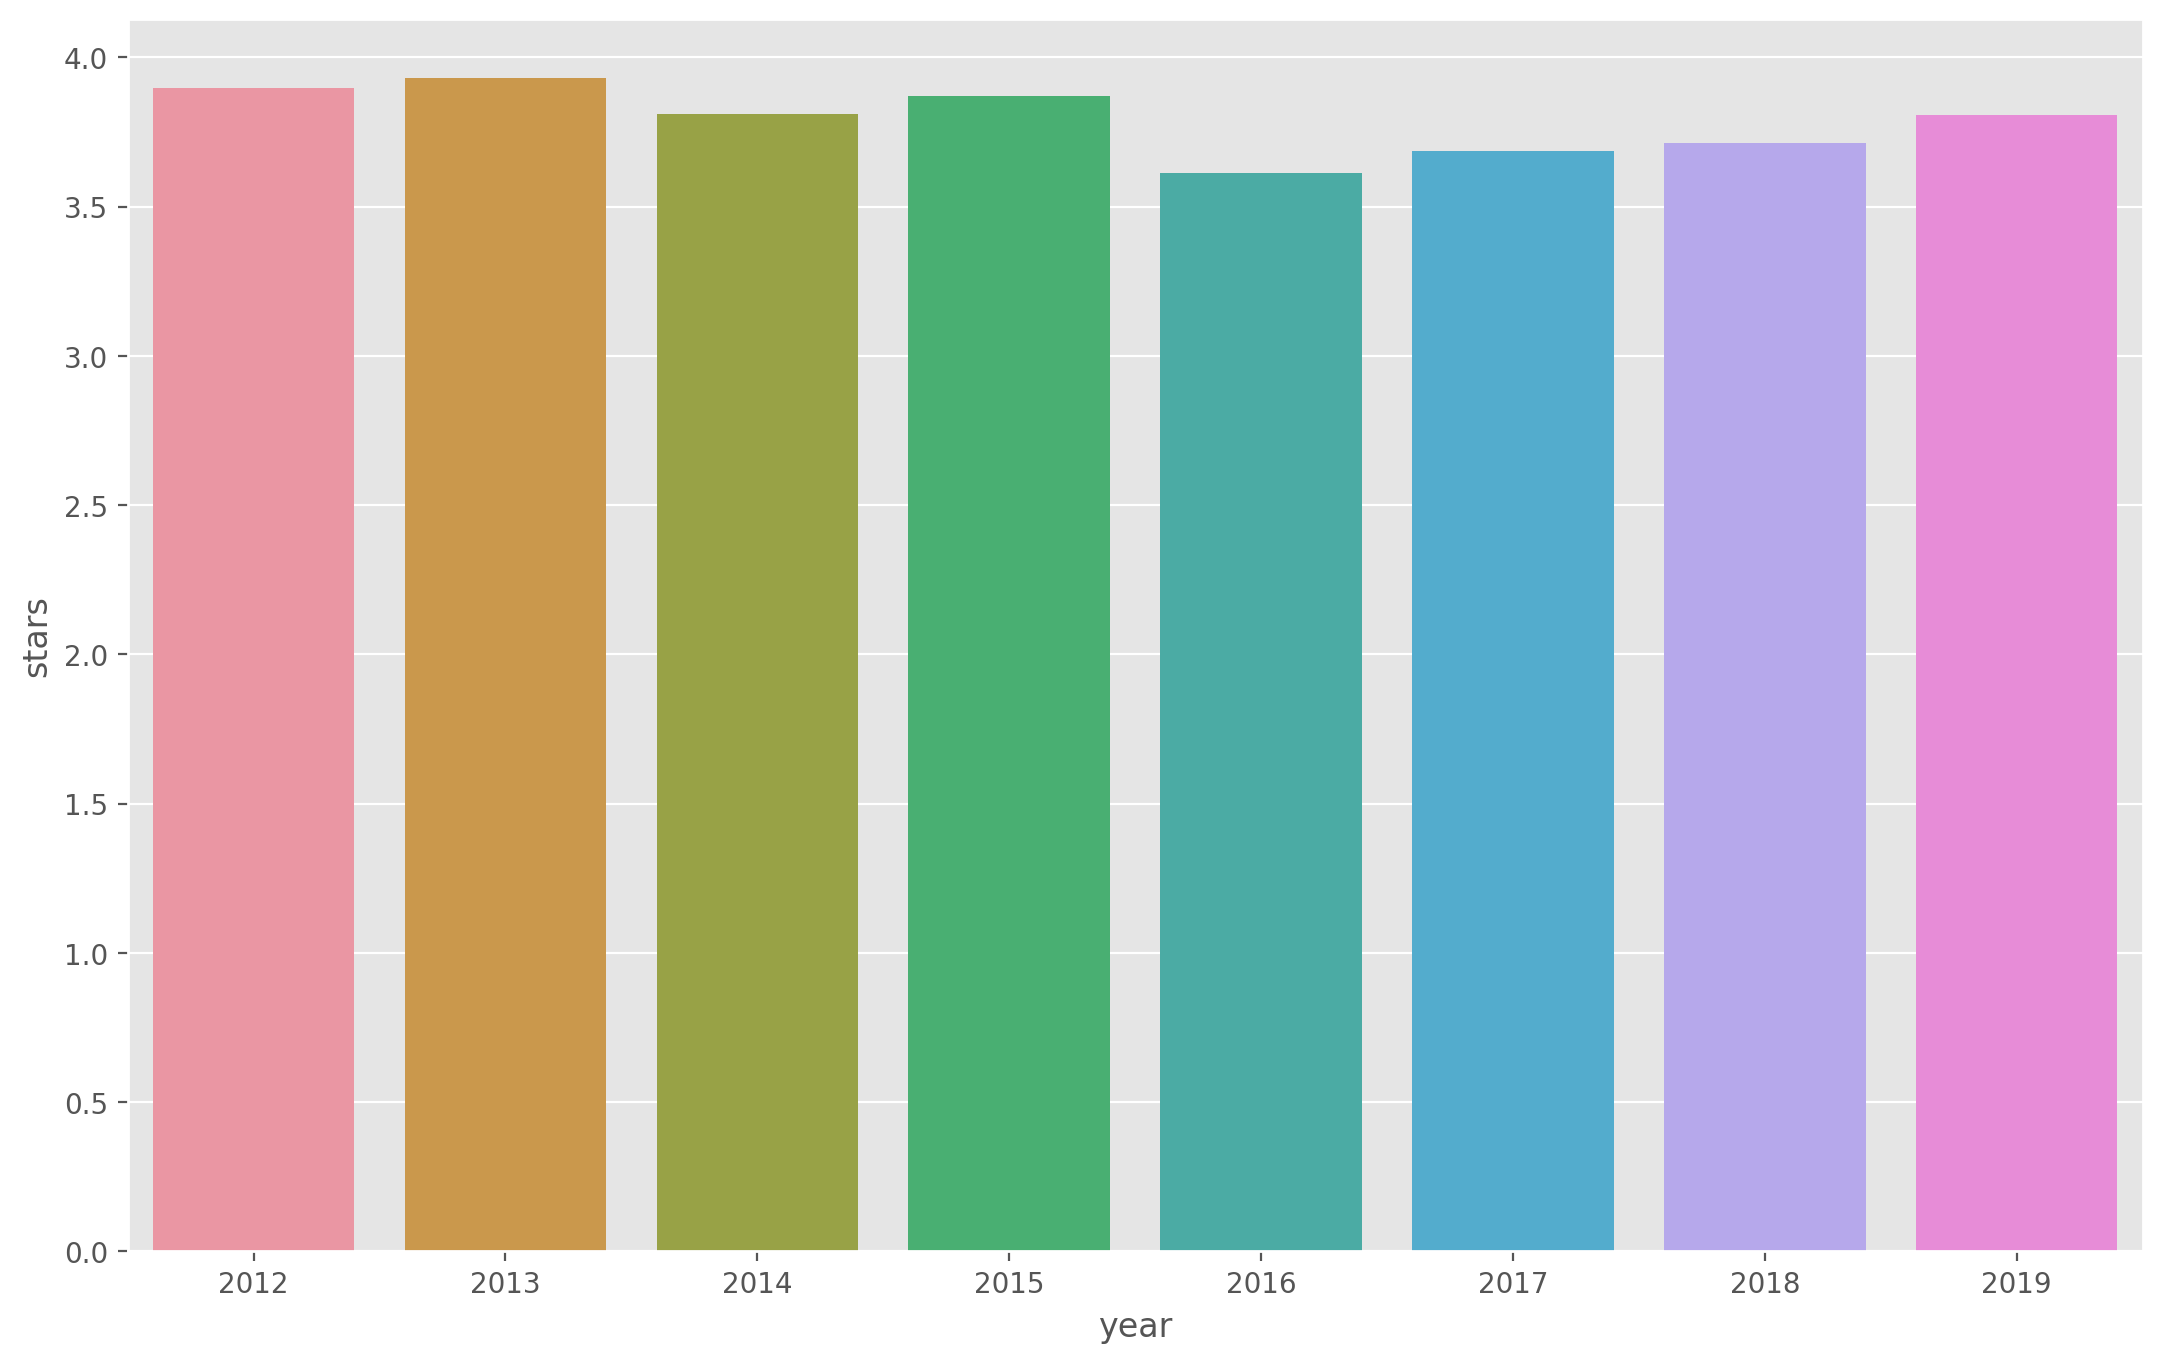

In [16]:
# Now, use sns.barplot with the correct usage of arguments
plt.style.use("ggplot")
plt.figure(figsize=(13,8),dpi=200)
sns.barplot(x='year', y='stars', data=df2_reset);

In [17]:
df["sentiment"] = df.stars.map({3:"neutral", 1:"negative", 2:"negative", 4:"positive", 5:"positive"})
df.sample(3)

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date,year,sentiment
393,2399264,40v8X9s9a0if79Ew9eH4Mw,AgfwqflEQL1VTDF3IMw9Og,RESDUcs7fIiihp38-d6_6g,5,4,0,1,Our experience at the Bacchanal was amazing. ...,2012-10-09 03:35:13,2012,positive
5670,2797485,NFsi6Q4pny6IQLbVCvLiNA,iuLJPNLnZflNEWBMU_U39A,RESDUcs7fIiihp38-d6_6g,5,0,0,0,We went for Sunday brunch and honestly the wai...,2013-08-11 05:48:16,2013,positive
6696,2880634,Sj5xccRXFNaJuiywAoEQBA,BQqXGdn1YT1ZlGRI55lKZA,RESDUcs7fIiihp38-d6_6g,2,0,0,0,Came here for a weekend brunch. We were\nReal...,2019-03-10 23:53:48,2019,negative


In [18]:
df["sentiment"].value_counts()

sentiment
positive    6883
negative    1973
neutral     1561
Name: count, dtype: int64

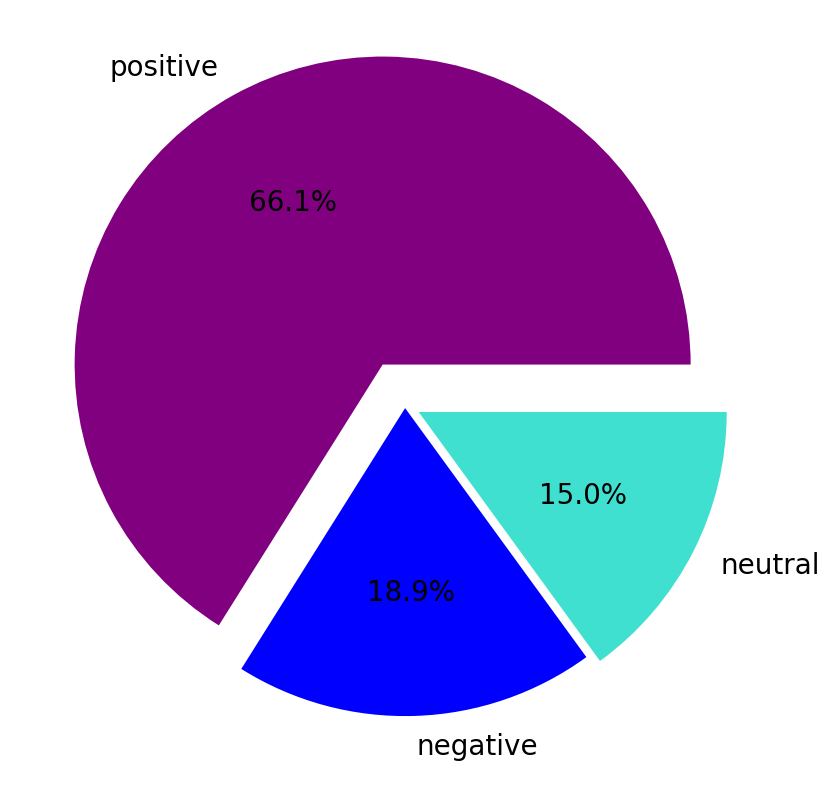

In [19]:
x = df["sentiment"].value_counts(normalize=True)
my_color = ["purple","blue", "turquoise"]
label = ["positive","negative","neutral"]
my_explode = [0.15,0.01,0.05]
plt.figure(figsize=(5,5), dpi = 200)
plt.pie(x, colors=my_color, labels=label, explode=my_explode, autopct="%1.1f%%");

## Text Preprocessing

## Remove punctuations, line breaks, digits, multiline "\r" and convert to lowercase

In [20]:
df["text"][0]

"After getting food poisoning at the Palms hotel, I was scared to eat at any more buffets. But we figured with the high price tag, the positive reviews etc, it was worth a chance. I'm really glad we gave it a try. (btw I uploaded a collage of the things we ate)\n\nThe seafood line is by the far the longest, i would not recommend showing up in heels if you're female, my feet were killing me between the line at the door, the line to get sat, and the seafood line. Totally worth it though.\n\nThe prime rib was the best Ive ever had.\n\nI loved the sweet potato tots.\n\nI even have PHO!\n\nThe music was great and so was our server Alma, ( he was a older gentleman with a mustache and was very attentive and delightful).\n\nI will return next trip in more comfortable shoes. After a horrible visit at the palms with non stop issues in a matter of 48 hours, your establishment was truly the high light of our trip. Thank you for an exquisite dinner."

In [21]:
df["text"] = df["text"].str.replace("[^\w\s]", "",regex = True).replace("\n","",regex = True).replace("[\d+]", "",regex = True).replace("\r","",regex = True).str.lower()

In [22]:
df["text"][0]

'after getting food poisoning at the palms hotel i was scared to eat at any more buffets but we figured with the high price tag the positive reviews etc it was worth a chance im really glad we gave it a try btw i uploaded a collage of the things we atethe seafood line is by the far the longest i would not recommend showing up in heels if youre female my feet were killing me between the line at the door the line to get sat and the seafood line totally worth it thoughthe prime rib was the best ive ever hadi loved the sweet potato totsi even have phothe music was great and so was our server alma  he was a older gentleman with a mustache and was very attentive and delightfuli will return next trip in more comfortable shoes after a horrible visit at the palms with non stop issues in a matter of  hours your establishment was truly the high light of our trip thank you for an exquisite dinner'

In [23]:
def wc(data, bgcolor):
    plt.figure(figsize=(10,10))
    mask = np.array(Image.open("hearth.jpg"))
    wc = WordCloud(background_color=bgcolor, stopwords=STOPWORDS, mask = mask)
    wc.generate("".join(data))
    plt.imshow(wc)
    plt.axis("off")
    

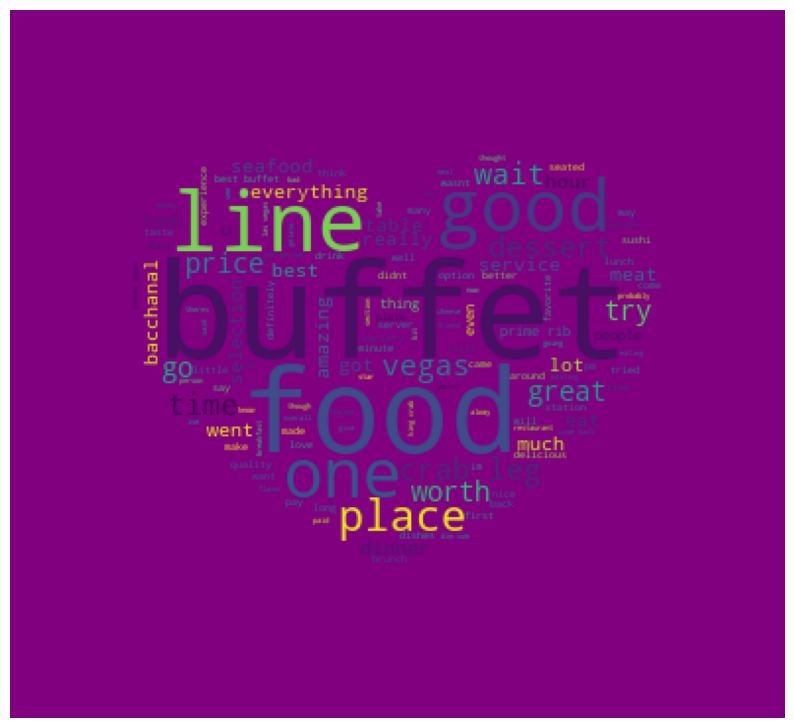

In [24]:
wc(df["text"], "purple")
# all text 

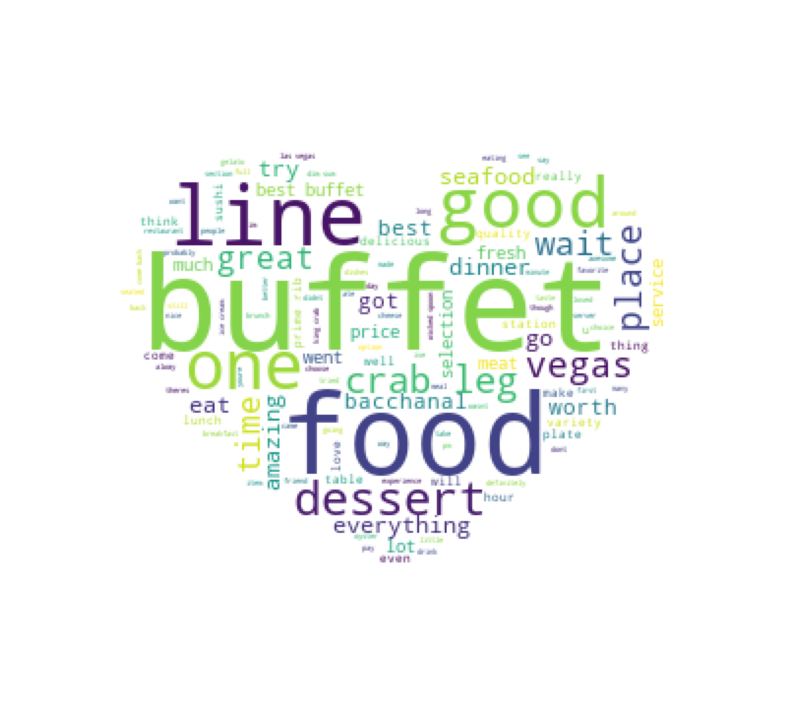

In [25]:
wc(df[df["sentiment"]=="positive"]["text"], "white")
# only positive

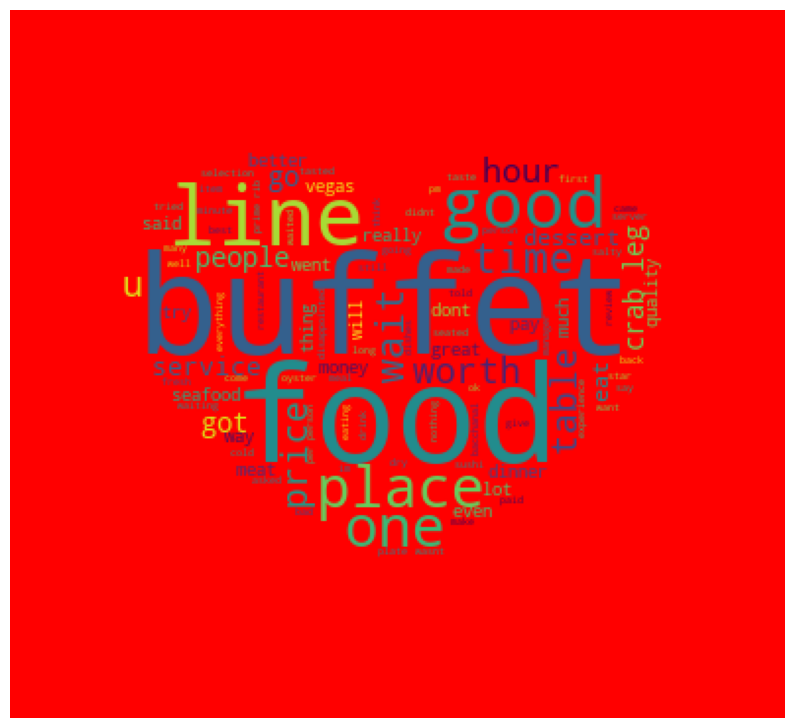

In [26]:
wc(df[df["sentiment"]=="negative"]["text"], "red")
# only negative

In [27]:
df["language"] = df["text"].apply(detect)

In [28]:
df["language"].value_counts()

language
en       10373
es          10
zh-cn        7
ja           7
ko           5
fr           5
de           4
da           2
sw           1
zh-tw        1
pt           1
sk           1
Name: count, dtype: int64

In [29]:
# other languages won't affect our model(has little quantity) so we took only english 
df = df[df["language"]=="en"]

In [30]:
df.drop(index=df[df["language"]!="en"].index, inplace=True)

In [31]:
df["text"].sample(13)

8331    by far the best buffet in vegas a must stop wi...
1584    wonderful buffet inside cesars palace the wait...
3091    i have been here many times each day its defer...
5973    cant really complain about the food  its one f...
4930    delicious not only did everything taste great ...
603     probably the best buffet i can ask for i came ...
8957    there is a new fast pass like system for busy ...
3971    it was just okay we paid  each for lunch  i th...
5002    the one buffet in vegas that you really need t...
2939    we were set to eat here on christmas day i dec...
4000    the price is a little on the expensive side co...
5608    the food here is absolutely amazing we stopped...
4700    this is the best buffet in vegas they got a la...
Name: text, dtype: object

In [32]:
df = df[["stars","sentiment","text"]]
df.sample(3)

,stars,sentiment,text
2325,3,neutral,i loved this place the first time i came the f...
6614,3,neutral,we only found at bacchanal buffet just three o...
6755,5,positive,amazing the food was sooooo good went on memor...


In [33]:
df.shape

(10373, 3)

In [34]:
df[["polarity","subjectivity"]]=df["text"].apply(lambda Text:pd.Series(TextBlob(Text).sentiment))

In [35]:
df.sample(5)

,stars,sentiment,text,polarity,subjectivity
6942,5,positive,ladies and gentlemanhere it isthe best buffet ...,0.583333,0.566667
3532,5,positive,outstanding food and service i dont usually l...,0.262500,0.618750
3460,5,positive,best buffet in vegasive been here a tons mainl...,0.223333,0.592500
6671,4,positive,one of the best buffets that i have been to th...,0.260390,0.513636
5969,5,positive,so good but definitely a really long line we w...,0.121458,0.586042


In [36]:
df = df[["stars","sentiment","text"]]

In [37]:
df.sample(5)

,stars,sentiment,text
2188,4,positive,bacchanal is my favorite buffet in vegas so fa...
4848,1,negative,terrible service extremely slow and unorganize...
9909,5,positive,i am not going to reiterate what has been said...
1177,3,neutral,there is a lot of variety at this buffet which...
7515,5,positive,ridiculously good everything there is off the ...


## the 7 most complained words

### 1 word

In [46]:

stop_words = stopwords.words('english')
neg = df[df["sentiment"]=="negative"]
vect = CountVectorizer(stop_words=stop_words, ngram_range=(1, 3))
X = vect.fit_transform(neg['text'])

# calculate the frequency
word_totals = X.sum(axis=0)
words_freq = [(word, word_totals[0, idx]) for word, idx in vect.vocabulary_.items()]
words_df = pd.DataFrame(words_freq, columns=['word', 'frequency'])

top_words = words_df.sort_values(by='frequency', ascending=False).head(13)

print(top_words)


        word  frequency
2       food       2663
7     buffet       2487
33      line       1491
151      get       1300
31      good       1226
25      wait       1104
684     time       1100
136     crab       1021
160     like        992
181    would        940
32       one        834
2380      us        833
155     back        791


### 2 3 words

In [64]:

stop_words = stopwords.words('english')

vect = CountVectorizer(stop_words=stop_words, ngram_range=(2,3))
X = vect.fit_transform(neg['text'])

# calculate the frequency
word_totals = X.sum(axis=0)
words_freq = [(word, word_totals[0, idx]) for word, idx in vect.vocabulary_.items()]
words_df = pd.DataFrame(words_freq, columns=['word', 'frequency'])

top_words = words_df.sort_values(by='frequency', ascending=False).head(7)

print(top_words)


              word  frequency
470      crab legs        521
503      prime rib        246
108     per person        231
366      come back        203
143      king crab        199
3286  wicked spoon        167
5766     las vegas        144


### 3 4 words

In [63]:

stop_words = stopwords.words('english')

vect = CountVectorizer(stop_words=stop_words, ngram_range=(3,4))
X = vect.fit_transform(neg['text'])

# calculate the frequency
word_totals = X.sum(axis=0)
words_freq = [(word, word_totals[0, idx]) for word, idx in vect.vocabulary_.items()]
words_df = pd.DataFrame(words_freq, columns=['word', 'frequency'])

top_words = words_df.sort_values(by='frequency', ascending=False).head(7)

print(top_words)


                    word  frequency
836       king crab legs         83
3602   best buffet vegas         50
6000      snow crab legs         43
7686    buffet las vegas         29
14469    go wicked spoon         26
11699  go somewhere else         23
3839       never go back         23


### I increased negativity degree with polarity 

In [52]:
df[["polarity","subjectivity"]]=df["text"].apply(lambda Text:pd.Series(TextBlob(Text).sentiment))

In [69]:
neg_pol = df[df["polarity"] < -0.3]["text"]

stop_words = stopwords.words('english')

vect = CountVectorizer(stop_words=stop_words, ngram_range=(2,3))
X = vect.fit_transform(neg_pol)

# calculate the frequency
word_totals = X.sum(axis=0)
words_freq = [(word, word_totals[0, idx]) for word, idx in vect.vocabulary_.items()]
words_df = pd.DataFrame(words_freq, columns=['word', 'frequency'])

top_words = words_df.sort_values(by='frequency', ascending=False).head(23)

print(top_words)

                  word  frequency
873    would recommend          6
967     food poisoning          6
15       food terrible          6
1319        per person          6
515       worst buffet          6
134          food cold          5
328   customer service          5
79          never come          4
80           come back          4
1709         cold food          4
2174  terrible service          4
2099          hour get          4
489   service horrible          4
1243           dont go          3
2500         food good          3
864          prime rib          3
436      prepared wait          3
261         save money          3
2245  bacchanal buffet          3
118    never come back          3
262           money go          3
285      save money go          3
516        buffet ever          3


In [70]:
neg_pol = df[df["polarity"] < -0.3]["text"]

stop_words = stopwords.words('english')

vect = CountVectorizer(stop_words=stop_words, ngram_range=(3,5))
X = vect.fit_transform(neg_pol)

# calculate the frequency
word_totals = X.sum(axis=0)
words_freq = [(word, word_totals[0, idx]) for word, idx in vect.vocabulary_.items()]
words_df = pd.DataFrame(words_freq, columns=['word', 'frequency'])

top_words = words_df.sort_values(by='frequency', ascending=False).head(7)

print(top_words)

                                 word  frequency
94                    never come back          3
717                 worst buffet ever          3
360                     save money go          3
409   go somewhere else food terrible          2
414      spit food several times made          2
413  terrible spit food several times          2
412   food terrible spit food several          2


## MODELLING

In [38]:
X = df["text"]
y = df["sentiment"]

In [39]:
def lemmafn(text):
    words = TextBlob(text).words
    return [pr.stem(word) for word in words]
    


In [40]:
vect = CountVectorizer(stop_words="english", ngram_range=(1,4), analyzer=lemmafn, min_df=4, max_features=10000)
X = vect.fit_transform(X)

In [41]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)

In [42]:
nb = MultinomialNB()
model = nb.fit(x_train,y_train)

In [43]:
pred_nb = model.predict(x_test)
pred_nb

array(['negative', 'positive', 'positive', ..., 'negative', 'negative',
       'positive'], dtype='<U8')

In [44]:
accuracy_score(pred_nb, y_test)

0.7720481927710844

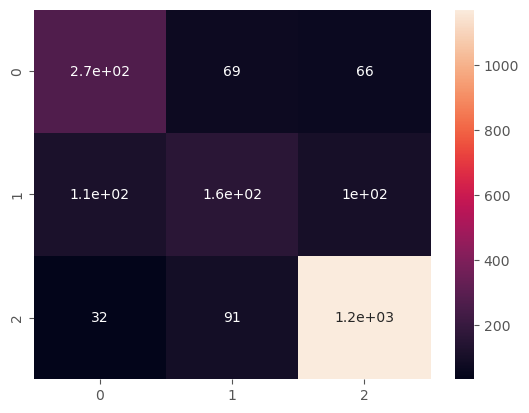

In [45]:
sns.heatmap(confusion_matrix(pred_nb, y_test), annot=True);

In [46]:
b = BernoulliNB()
model_b = b.fit(x_train,y_train)
pred_b = model_b.predict(x_test)


In [47]:
accuracy_score(pred_b, y_test)

0.6795180722891566

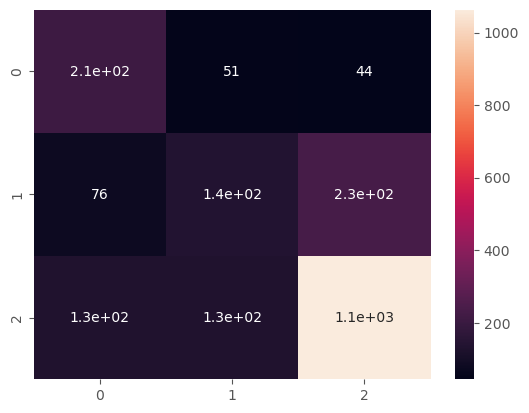

In [48]:
sns.heatmap(confusion_matrix(pred_b, y_test), annot=True);

In [49]:
Log=LogisticRegression()
model_log = Log.fit(x_train,y_train)
log_pred=model_log.predict(x_test)
print(accuracy_score(y_test,log_pred))

0.7995180722891566


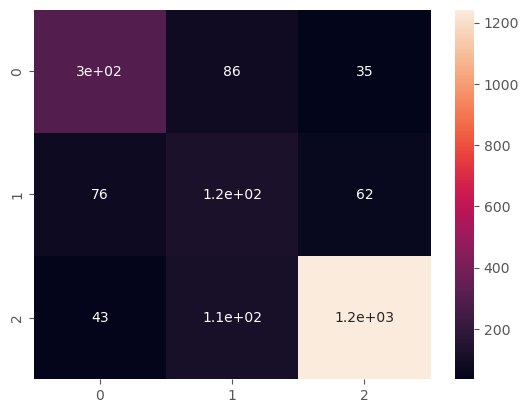

In [50]:
sns.heatmap(confusion_matrix(log_pred, y_test), annot=True);

In [51]:
knn=KNeighborsClassifier()
model_knn = Log.fit(x_train,y_train)
knn_pred=model_knn.predict(x_test)
print(accuracy_score(y_test,knn_pred))

0.7995180722891566


In [53]:

def model_classification(X,y):
    '''
    X: independent variable
    y: dependent variable
    return best model and its accuracy
    '''
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
    x_train = x_train.toarray()
    x_test = x_test.toarray()
    models = [GaussianNB(),BernoulliNB(),DecisionTreeClassifier(),MultinomialNB(),LogisticRegression(),RandomForestClassifier(), GradientBoostingClassifier(), KNeighborsClassifier(n_neighbors=5)]
    results=[]
    for model in models:
        model.fit(x_train,y_train)
        model_predict=model.predict(x_test)
        print("Model: ",model)
        print("Model Accuracy: ",accuracy_score(model_predict,y_test))
        print("Model Confusion Matrix: ",confusion_matrix(model_predict,y_test),"\n")
        print("Model Classification Report: ",classification_report(model_predict,y_test))
        print("*"*50)
        results.append(accuracy_score(model_predict,y_test))
    #best model
    best_model=models[results.index(max(results))]
    print("Best Model: ",best_model)
    print("Best Model Accuracy: ",max(results))
    return best_model,max(results), confusion_matrix(model_predict,y_test)

model_classification(X,y)

Model:  GaussianNB()
Model Accuracy:  0.3383132530120482
Model Confusion Matrix:  [[128  54 170]
 [208 171 766]
 [ 79  96 403]] 

Model Classification Report:                precision    recall  f1-score   support

    negative       0.31      0.36      0.33       352
     neutral       0.53      0.15      0.23      1145
    positive       0.30      0.70      0.42       578

    accuracy                           0.34      2075
   macro avg       0.38      0.40      0.33      2075
weighted avg       0.43      0.34      0.30      2075

--------------------------------------------------
Model:  BernoulliNB()
Model Accuracy:  0.6795180722891566
Model Confusion Matrix:  [[ 208   51   44]
 [  76  139  232]
 [ 131  131 1063]] 

Model Classification Report:                precision    recall  f1-score   support

    negative       0.50      0.69      0.58       303
     neutral       0.43      0.31      0.36       447
    positive       0.79      0.80      0.80      1325

    accuracy        

(LogisticRegression(),
 0.8004819277108434,
 array([[ 108,   45,   49],
        [  44,   46,   51],
        [ 263,  230, 1239]], dtype=int64))